In [1]:
import numpy as np
import seaborn as sns
import subprocess
import pandas as pd
import pylab as pl
import pydot
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')
%matplotlib inline

In [5]:
df = pd.read_csv("ORGANICS.csv",encoding="cp1251")
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [8]:
df = df.fillna(df.median(axis=0), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [12]:
X=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, random_state=50)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [10]:
y_score = tree.predict(X_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.7952602369881506
0.39939024390243905
0.6328502415458938
0.48971962616822434
0.6618992198227134
0.3850788093056376
0.36974948794706164


[[0.5        0.5       ]
 [0.87016575 0.12983425]
 [0.87016575 0.12983425]
 ...
 [0.71365639 0.28634361]
 [0.75974026 0.24025974]
 [0.53531599 0.46468401]]
[0.5        0.12983425 0.12983425 ... 0.28634361 0.24025974 0.46468401]


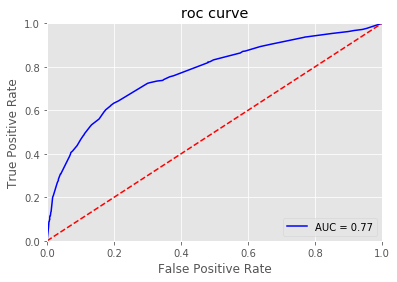

In [14]:
pProb = tree.predict_proba(X_test)
print(pProb)
pred = pProb[:,1]
print(pred)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('roc curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
tree_balanced = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=50, class_weight='balanced')
tree_balanced.fit(X_train, y_train)

y_score = tree_balanced.predict(X_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.736163191840408
0.6961424332344214
0.4847107438016529
0.5714981729598052
0.7229206746661869
0.402933471149943
0.38960725585012157
